### Codio Activity 4.6: Data Cleaning

**Expected Time: 120 Minutes**

**Total Points: 40**

This assignment focuses on making decisions with a somewhat dirty dataset.  From datatype conversion, to object removal and cleaning, to missing value handling, cleaning data will be a regular activity while working with data in the wild.  The dataset comes from kaggle [here](https://www.kaggle.com/shansh8/companies-info-wikipedia-2021), and represents information on businesses pulled from [dbpedia](http://dbpedia.org) pertaining to business indicators from a variety of international companies.


#### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)
- [Problem 8](#Problem-8)
- [Problem 9](#Problem-9)


![](images/dbpedia.png)

### Load and Explore the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('/Users/jaikumar/Desktop/Berkeley_ML/codio_4.5_solution/data/biz.zip', compression = 'zip')

In [4]:
df.head()

,a,name,type,foundation,location,products,sector,employee,assets,equity,revenue,profit
0,http://dbpedia.org/resource/Deutsche_EuroShop,Deutsche EuroShop AG,http://dbpedia.org/resource/Aktiengesellschaft,1999,http://dbpedia.org/resource/Germany,Investment in shopping centers,http://dbpedia.org/resource/Real_property,4,2.96E+09,1.25E+09,2.24E+08,8.04E+07
1,http://dbpedia.org/resource/Deutsche_EuroShop,Deutsche EuroShop AG,http://dbpedia.org/resource/Aktiengesellschaft,1999,http://dbpedia.org/resource/Hamburg,Investment in shopping centers,http://dbpedia.org/resource/Real_property,4,2.96E+09,1.25E+09,2.24E+08,8.04E+07
2,http://dbpedia.org/resource/Industry_of_Machin...,Industry of Machinery and Tractors,http://dbpedia.org/resource/Društvo_sa_ogranič...,8/12/1996,http://dbpedia.org/resource/Belgrade,http://dbpedia.org/resource/Tractors,http://dbpedia.org/resource/Agribusiness,4,4.65E+07,0,30000,-€0.47 million
3,http://dbpedia.org/resource/Industry_of_Machin...,Industry of Machinery and Tractors,http://dbpedia.org/resource/Društvo_sa_ogranič...,8/12/1996,http://dbpedia.org/resource/Serbia,http://dbpedia.org/resource/Agricultural_machi...,http://dbpedia.org/resource/Agribusiness,4,4.65E+07,0,30000,-€0.47 million
4,http://dbpedia.org/resource/Industry_of_Machin...,Industry of Machinery and Tractors,http://dbpedia.org/resource/Društvo_sa_ogranič...,8/12/1996,http://dbpedia.org/resource/Belgrade,http://dbpedia.org/resource/Agricultural_machi...,http://dbpedia.org/resource/Agribusiness,4,4.65E+07,0,30000,-€0.47 million


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   a           10000 non-null  object
 1   name        9969 non-null   object
 2   type        10000 non-null  object
 3   foundation  9665 non-null   object
 4   location    9936 non-null   object
 5   products    9014 non-null   object
 6   sector      10000 non-null  object
 7   employee    10000 non-null  int64 
 8   assets      7103 non-null   object
 9   equity      7124 non-null   object
 10  revenue     6943 non-null   object
 11  profit      7107 non-null   object
dtypes: int64(1), object(11)
memory usage: 937.6+ KB


In [22]:
df.shape[0]

10000

[Back to top](#Index:) 

### Problem 1

#### Plot of Missing Data

**0 Points**

Create a barplot using `matplotlib` with the $x$-axis representing the columns and the $y$-axis representing the count of missing values. Sort these values from least to greatest.  Create a `results` folder in the file tree to the left of your screen and save your plot as `missing_plot.png`.  

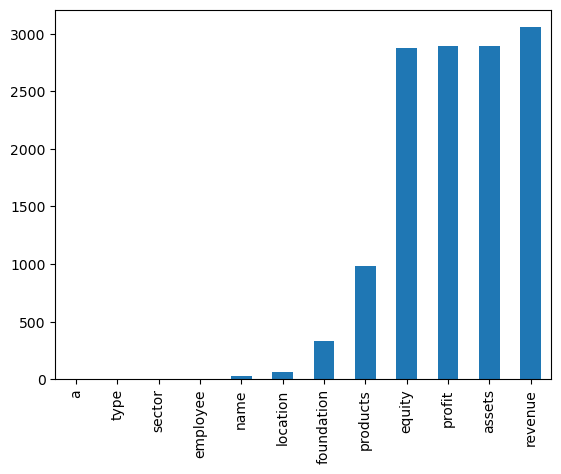

In [7]:
### GRADED

### BEGIN SOLUTION
df.isnull().sum().sort_values().plot(kind = 'bar')
#plt.savefig('results/missing_plot_.png')
#plt.close();
plt.show()
### END SOLUTION

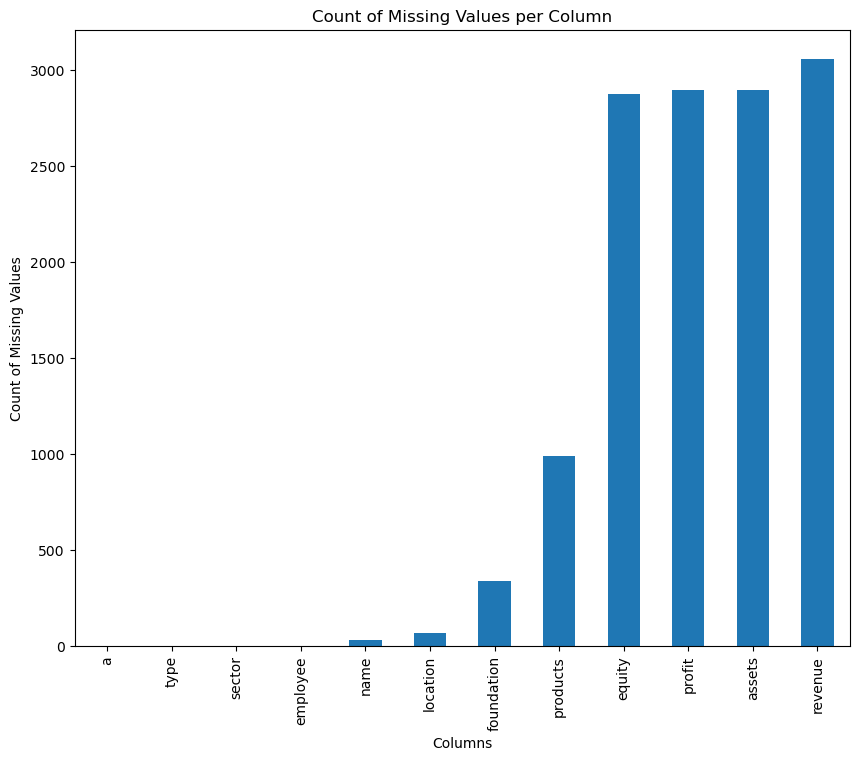

In [8]:
missing_counts = df.isnull().sum()

# 2. Sort the counts
sorted_counts = missing_counts.sort_values()

# 3. Create the bar plot
plt.figure(figsize=(10, 8))
sorted_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values per Column')

# 4. Save the plot
#plt.savefig('results/missing_plot.png')
plt.show()

[Back to top](#Index:) 

### Problem 2

#### `name` column

**5 Points**

Thirty One values in the `name` column are missing.  Subset the data to examine these observations where name is missing. Assign the observations missing `name` data as a DataFrame to `ans2` below.  

In [11]:
### GRADED

ans2 = None

### BEGIN SOLUTION
#ans2 = df.loc[df['name'].isnull()]
### END SOLUTION
missing_name_data = df[df['name'].isna()]

# Assign the result to ans2
ans2 = missing_name_data

# If you want to see the DataFrame
print(ans2)
# Answer check
#print(type(ans2))
#ans2.head()

                                                      a name  \
3906    http://dbpedia.org/resource/Royal_Canadian_Mint  NaN   
3909    http://dbpedia.org/resource/Royal_Canadian_Mint  NaN   
4861     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4862     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4863     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4864     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4865     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4866     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4879     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4880     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4881     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4882     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4883     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
4884     http://dbpedia.org/resource/Bulgarian_Postbank  NaN   
6502  http://dbpedia.org/resource/FirstM

[Back to top](#Index:) 

### Problem 3

### Filling Missing Values in `name`

**5 Points**

Examining the rows missing values in names shows that in the adjacent `a` column, the end of the url contains what can stand in as a name.  Using a string method, split the url by `/`.  This generates a series object that you are to save to `split_series` below.  This series will be a collection of lists:

```python
0       [http:, , dbpedia.org, resource, Deutsche_Euro...
1       [http:, , dbpedia.org, resource, Deutsche_Euro...
2       [http:, , dbpedia.org, resource, Industry_of_M...
3       [http:, , dbpedia.org, resource, Industry_of_M...
4       [http:, , dbpedia.org, resource, Industry_of_M...
         .
         .
         .
```

Assign your split url's as a series to `ans3` below.

In [12]:
### GRADED

ans3 = None

### BEGIN SOLUTION
ans3 = df['a'].str.split('/')
### END SOLUTION

# Answer check
print(type(ans3))
ans3.head()

<class 'pandas.core.series.Series'>


0    [http:, , dbpedia.org, resource, Deutsche_Euro...
1    [http:, , dbpedia.org, resource, Deutsche_Euro...
2    [http:, , dbpedia.org, resource, Industry_of_M...
3    [http:, , dbpedia.org, resource, Industry_of_M...
4    [http:, , dbpedia.org, resource, Industry_of_M...
Name: a, dtype: object

[Back to top](#Index:) 

### Problem 4

#### Extracting the names

**5 Points**

To extract the last element of this list, use the `.apply` method together with an appropriate `lambda` function to create a series based on the last entry of the above list in each row.  Your results should begin with:

```python
0                        Deutsche_EuroShop
1                        Deutsche_EuroShop
2       Industry_of_Machinery_and_Tractors
3       Industry_of_Machinery_and_Tractors
4       Industry_of_Machinery_and_Tractors
                       ...                
```

Save this series to `ans4` below.

In [13]:
### GRADED

ans4 = None

### BEGIN SOLUTION
ans4 = df['a'].str.split('/').apply(lambda x: x[-1])
### END SOLUTION

# Answer check
print(type(ans4))
ans4.head()

<class 'pandas.core.series.Series'>


0                     Deutsche_EuroShop
1                     Deutsche_EuroShop
2    Industry_of_Machinery_and_Tractors
3    Industry_of_Machinery_and_Tractors
4    Industry_of_Machinery_and_Tractors
Name: a, dtype: object

[Back to top](#Index:) 

### Problem 5

#### Filling the Missing Values in `name` 

**5 Points**

The `.fillna` method can accept a series and fill in the missing values based on the matching indicies.  Use your earlier series with the extracted name (problem 4), to fill in the missing values in the `name` column.  Overwrite the earlier column and create a DataFrame with no missing values in the `name` column.  Assign this new DataFrame to `ans5` below.

In [14]:
### GRADED

ans5 = None

### BEGIN SOLUTION
df['name'] = df['name'].fillna(df['a'].str.split('/').apply(lambda x: x[-1]))
ans5 = df
### END SOLUTION

# Answer check
print(type(ans5))
ans5['name'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>


0

[Back to top](#Index:) 

### Problem 6

#### `location` missing values

**5 Points**

Note that the `location` column is still missing data.  The column is supposed to represent the location of the company as a url in `dbpedia` or in some cases simply the name of the city the company is located in.  Create a series of the value counts for the `foundation` column in rows where `location` is missing.  Assign these counts as a series to `ans6` below.

In [15]:
### GRADED

ans6 = None

### BEGIN SOLUTION
ans6 = df[df['location'].isnull()].foundation.value_counts()
### END SOLUTION

# Answer check
print(type(ans6))
ans6.head()

<class 'pandas.core.series.Series'>


foundation
4/8/1980                                   34
Colombo, Sri Lanka                         12
9/7/1933                                    6
New Orleans, Louisiana, U.S.                3
Canonsburg, Pennsylvania, United States     2
Name: count, dtype: int64

[Back to top](#Index:) 

### Problem 7

#### Replace missing `location` with `foundation`

**5 Points**

While not perfect, the values in the `foundation` column could serve as a fill in for the missing values in `location`.  Replace the missing values in `location` with their corresponding value in `foundation`.  Assign the series with the value filled for `location` to `ans7` below.

In [16]:
### GRADED

ans7 = None

### BEGIN SOLUTION
ans7 = df['location'].fillna(df[df['location'].isnull()]['foundation'])
### END SOLUTION

# Answer check
print(type(ans7))
ans7

<class 'pandas.core.series.Series'>


0        http://dbpedia.org/resource/Germany
1        http://dbpedia.org/resource/Hamburg
2       http://dbpedia.org/resource/Belgrade
3         http://dbpedia.org/resource/Serbia
4       http://dbpedia.org/resource/Belgrade
                        ...                 
9995                     London, England, UK
9996                     London, England, UK
9997                     London, England, UK
9998                     London, England, UK
9999                     London, England, UK
Name: location, Length: 10000, dtype: object

[Back to top](#Index:) 

### Problem 8

#### Drop rows missing revenue and profit

**5 Points**


Note that the `revenue` and `profit` columns do not have all their values.  Subset the entire DataFrame to those rows not missing values in either `revenue` or `profit`.  Assign you answer as a DataFrame to `ans8` below.

In [23]:
### GRADED

ans8 = None

### BEGIN SOLUTION
#ans8 = df.dropna(subset = ['revenue', 'profit'])
# Create a boolean mask for rows where both 'revenue' and 'profit' are not missing
mask = df['revenue'].notna() & df['profit'].notna()

# Apply the mask to subset the DataFrame
ans8 = df[mask]

# Display the DataFrame
#print(ans8)
### END SOLUTION

# Answer check
print(type(ans8))
ans8.shape[0]

<class 'pandas.core.frame.DataFrame'>


5204

[Back to top](#Index:) 

### Problem 9

#### How many rows were lost?

**5 Points**

Compare the shape of the original dataset to your solution in 8.  How many rows were lost dropping the data?  Assign your answer as an integer to `ans9` below.

In [21]:
### GRADED

ans9 = None

### BEGIN SOLUTION
ans9 = df.shape[0] - df.dropna(subset = ['revenue', 'profit']).shape[0]
### END SOLUTION

# Answer check
print(type(ans9))
ans9

<class 'int'>


4796

Note that you've lost almost half of our data dropping missing revenue and profit.  Perhaps a different approach should be considered!  Take some time and examine other missing data in our dataset and some strategies for dealing with it.  If it is possible to keep observations do so.